In [2]:
import numpy as np
import pandas as pd

# Explonatory Data Analysis

In [3]:
loan_applications = pd.read_csv('loan_applications.csv')
loan_applications.head()

,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,fraud_flag,fraud_type
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,...,1100.0,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,Approved,0,NaN
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,...,0.0,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,Approved,0,NaN
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,...,4600.0,31.08,Rented,"H.No. 81, Dutta Path, Kozhikode-340301, Tadepa...",56,Other,4,Approved,0,NaN
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,...,4000.0,13.89,Rented,"H.No. 022, Rege Road, Tiruvottiyur-927857, Aur...",27,Other,4,Declined,0,NaN
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,...,1100.0,2.51,Rented,"85/24, Bali Zila, Sambalpur 922071, Tumkur, Ke...",50,Other,0,Declined,0,NaN


**Chceking features with null values**

In [4]:
print("Counting Non-Null Values in Each Column")
print("--------------------------------------------------")
print("The Dataset Consist of",loan_applications.shape[0], "Rows and", loan_applications.shape[1], "Columns")
print("--------------------------------------------------")
print(loan_applications.info())

Counting Non-Null Values in Each Column
--------------------------------------------------
The Dataset Consist of 50000 Rows and 21 Columns
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_id             50000 non-null  object 
 1   customer_id                50000 non-null  object 
 2   application_date           50000 non-null  object 
 3   loan_type                  50000 non-null  object 
 4   loan_amount_requested      50000 non-null  float64
 5   loan_tenure_months         50000 non-null  int64  
 6   interest_rate_offered      50000 non-null  float64
 7   purpose_of_loan            50000 non-null  object 
 8   employment_status          50000 non-null  object 
 9   monthly_income             50000 non-null  float64
 10  cibil_score            

In [5]:
print("Fraud Type Feature Analysis")
print("--------------------------------------------------")
print(round(loan_applications['fraud_type'].isnull().sum()/loan_applications['fraud_type'].shape[0]*100,2), "% of Fraud Type feature data is missing")

Fraud Type Feature Analysis
--------------------------------------------------
97.95 % of Fraud Type feature data is missing


In [6]:
loan_applications.describe()

,loan_amount_requested,loan_tenure_months,interest_rate_offered,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,applicant_age,number_of_dependents,fraud_flag
count,5.000000e+04,50000.0000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.139130e+05,121.3884,10.528547,50844.940000,699.149760,3066.3620,8.573188,43.060880,2.012280,0.020520
std,2.752126e+05,121.4104,1.926442,23874.742237,49.920325,1896.9745,9.587649,12.970254,1.408761,0.141772
min,1.000000e+05,12.0000,7.000000,10000.000000,476.000000,0.0000,0.000000,21.000000,0.000000,0.000000
25%,3.000000e+05,24.0000,9.150000,33600.000000,665.000000,1700.0000,3.090000,32.000000,1.000000,0.000000
50%,5.030000e+05,60.0000,10.510000,50300.000000,699.000000,3000.0000,5.950000,43.000000,2.000000,0.000000
75%,7.010000e+05,240.0000,11.850000,67300.000000,733.000000,4400.0000,10.292500,54.000000,3.000000,0.000000
max,1.618000e+06,360.0000,19.620000,162000.000000,888.000000,11400.0000,102.000000,65.000000,4.000000,1.000000


In [7]:
obj_bool_df = loan_applications.select_dtypes(include=['object', 'bool'])

for col in obj_bool_df.columns:
    print("Non numeric Column Analysis")
    print("--------------------------------------------------")
    print(f"Column: {col}")
    print(obj_bool_df[col].value_counts())
    print()

Non numeric Column Analysis
--------------------------------------------------
Column: application_id
application_id
c8bf0bea-70e6-4870-9125-41b8210c527f    1
770474db-cb22-4aa9-8f34-12edac89d67a    1
2235df4f-c397-4e53-ab6a-607180e9d7ae    1
7cd3708d-b967-4fd5-a504-415b356664af    1
227a7ba8-acca-4f6f-8759-7edd0ac08bd1    1
                                       ..
dc4fd09d-b91c-42a2-b857-7e7fa38edf72    1
f1fcc8de-23ff-44a2-9515-def4e61bd79d    1
3c4a3157-eee4-43d0-b873-b96340c626ab    1
04d8aee8-5d73-42af-a5c6-73c5df6b90d5    1
6aaf792e-6755-408e-a9ef-4d9bf841864b    1
Name: count, Length: 50000, dtype: int64

Non numeric Column Analysis
--------------------------------------------------
Column: customer_id
customer_id
CUST100339    10
CUST114139    10
CUST118934    10
CUST110828    10
CUST119441     9
              ..
CUST100912     1
CUST101689     1
CUST114119     1
CUST118256     1
CUST116796     1
Name: count, Length: 18314, dtype: int64

Non numeric Column Analysis
-----------

In [11]:
obj_bool_df = loan_applications.select_dtypes(include=['object', 'bool'])
for col in obj_bool_df.columns:
    print("Distribution of Non-Numeric Columns")
    print("--------------------------------------------------") 
    print(f"Column: {col}")
    print(obj_bool_df[col].value_counts(normalize=True))
   


Distribution of Non-Numeric Columns
--------------------------------------------------
Column: application_id
application_id
c8bf0bea-70e6-4870-9125-41b8210c527f    0.00002
770474db-cb22-4aa9-8f34-12edac89d67a    0.00002
2235df4f-c397-4e53-ab6a-607180e9d7ae    0.00002
7cd3708d-b967-4fd5-a504-415b356664af    0.00002
227a7ba8-acca-4f6f-8759-7edd0ac08bd1    0.00002
                                         ...   
dc4fd09d-b91c-42a2-b857-7e7fa38edf72    0.00002
f1fcc8de-23ff-44a2-9515-def4e61bd79d    0.00002
3c4a3157-eee4-43d0-b873-b96340c626ab    0.00002
04d8aee8-5d73-42af-a5c6-73c5df6b90d5    0.00002
6aaf792e-6755-408e-a9ef-4d9bf841864b    0.00002
Name: proportion, Length: 50000, dtype: float64
Distribution of Non-Numeric Columns
--------------------------------------------------
Column: customer_id
customer_id
CUST100339    0.00020
CUST114139    0.00020
CUST118934    0.00020
CUST110828    0.00020
CUST119441    0.00018
               ...   
CUST100912    0.00002
CUST101689    0.00002
CUST

**What are the average mean for numeric features**

In [8]:
loan_applications.select_dtypes(include=np.number).mean()

loan_amount_requested    513913.040000
loan_tenure_months          121.388400
interest_rate_offered        10.528547
monthly_income            50844.940000
cibil_score                 699.149760
existing_emis_monthly      3066.362000
debt_to_income_ratio          8.573188
applicant_age                43.060880
number_of_dependents          2.012280
fraud_flag                    0.020520
dtype: float64

In [21]:
print("The data in Fruad Flagged",loan_applications['fraud_flag'].unique(), "and the Data Type is", loan_applications['fraud_flag'].dtype)
print("Changing the Fraud Flag to Boolean")
print("--------------------------------------------------")
loan_applications['fraud_flag'] = loan_applications['fraud_flag'].astype(bool)
print("The data in Fraud Flagged", loan_applications['fraud_flag'].unique(), "and the Data Type is", loan_applications['fraud_flag'].dtype)

The data in Fruad Flagged [0 1] and the Data Type is int64
Changing the Fraud Flag to Boolean
--------------------------------------------------
The data in Fraud Flagged [False  True] and the Data Type is bool


**What are the average values of numerical features for different non numerical features?**

In [44]:
non_numeric_columns = loan_applications.select_dtypes(exclude=np.number).columns.tolist()
print(f"Non-Numeric Columns in the Dataset:{non_numeric_columns}")

print("--------------------------------------------------")

for col in non_numeric_columns:
    print(f"\nMean of numeric features grouped by '{col}':")
    print(loan_applications.groupby(col).mean(numeric_only=True))

Non-Numeric Columns in the Dataset:['application_id', 'customer_id', 'application_date', 'loan_type', 'purpose_of_loan', 'employment_status', 'property_ownership_status', 'residential_address', 'gender', 'loan_status', 'fraud_flag', 'fraud_type']
--------------------------------------------------

Mean of numeric features grouped by 'application_id':
                                      loan_amount_requested  \
application_id                                                
00003836-17f2-4ed9-ab3e-8090cd396b43               814000.0   
0001911e-9619-4e50-b2a7-700db5ec965b               927000.0   
000421f2-46b1-4456-8d4f-6425f35e6adc               488000.0   
0004e906-17bb-4f5e-92c9-fcb1b04b430f               599000.0   
00051f7b-1078-4204-8a8a-3bc695cdf909               524000.0   
...                                                     ...   
fff9793c-d269-46df-89e7-caf1db2fead7               676000.0   
fffb5e7f-a555-45f2-8b38-5b6abaf3f546               559000.0   
fffe2c08-01eb-46e

In [46]:
loan_applications.columns

Index(['application_id', 'customer_id', 'application_date', 'loan_type',
       'loan_amount_requested', 'loan_tenure_months', 'interest_rate_offered',
       'purpose_of_loan', 'employment_status', 'monthly_income', 'cibil_score',
       'existing_emis_monthly', 'debt_to_income_ratio',
       'property_ownership_status', 'residential_address', 'applicant_age',
       'gender', 'number_of_dependents', 'loan_status', 'fraud_flag',
       'fraud_type'],
      dtype='object')

**GROUPING**

In [60]:
# Create Age Group Bins
bins = [0, 20, 30, 50, float('inf')]
labels = ['Young', 'Young Adult', 'Adult', 'Old']

loan_applications['age_group'] = pd.cut(loan_applications['applicant_age'], bins=bins, labels=labels)


In [ ]:
loan_applications['city'] = loan_applications['residential_address'].apply(lambda x: str(x).split(',')[3].strip() if pd.notnull(x) and len(str(x).split(',')) > 3 else 'Unknown')

# Verify extraction
print("Unique Cities Extracted:")
print(loan_applications['city'].unique())


**Summary Tables**

In [69]:
print("Different Loan Types Analysis: Mean of Numeric Features")
print("--------------------------------------------------")
print(
    loan_applications.pivot_table(
        values=["loan_amount_requested", "loan_tenure_months", "interest_rate_offered",
                "monthly_income", "cibil_score", "existing_emis_monthly", "debt_to_income_ratio"],
        index=["loan_type"],
        aggfunc="mean"
    )
)
print("--------------------------------------------------")

print("Employment Status Analysis: Mean of Numeric Features")
print("--------------------------------------------------")
print(
    loan_applications.pivot_table(
        values=["loan_amount_requested", "loan_tenure_months", "interest_rate_offered",
                "monthly_income", "cibil_score", "existing_emis_monthly", "debt_to_income_ratio"],
        index=["employment_status"],
        aggfunc="mean"
    )
)
print("--------------------------------------------------")

print("Fraud Type Analysis: Mean of Numeric Features")
print("--------------------------------------------------")
print(
    loan_applications.pivot_table(
        values=["loan_amount_requested", "loan_tenure_months", "interest_rate_offered",
                "monthly_income", "cibil_score", "existing_emis_monthly", "debt_to_income_ratio"],
        index=["fraud_type"],
        aggfunc="mean"
    )
)
print("--------------------------------------------------")

print("Residential Address Analysis: Mean of Numeric Features")
print("--------------------------------------------------")
print(
    loan_applications.pivot_table(
        values=["loan_amount_requested", "loan_tenure_months", "interest_rate_offered",
                "monthly_income", "cibil_score", "existing_emis_monthly", "debt_to_income_ratio"],
        index=["city"],
        aggfunc="mean"
    )
)
print("--------------------------------------------------")

print("Loan Purpose Analysis: Mean of Numeric Features")
print("--------------------------------------------------")
print(
    loan_applications.pivot_table(
        values=["loan_amount_requested", "loan_tenure_months", "interest_rate_offered",
                "monthly_income", "cibil_score", "existing_emis_monthly", "debt_to_income_ratio"],
        index=["purpose_of_loan"],
        aggfunc="mean"
    )
)
print("--------------------------------------------------")

print("Applicant Age Analysis: Mean of Numeric Features")
print("--------------------------------------------------")
print(
    loan_applications.pivot_table(
        values=["loan_amount_requested", "loan_tenure_months", "interest_rate_offered",
                "monthly_income", "cibil_score", "existing_emis_monthly", "debt_to_income_ratio"],
        index=["age_group"],
        aggfunc="mean"
    )
)
print("--------------------------------------------------")
print("Property Ownership Status Analysis: Mean of Numeric Features")
print("--------------------------------------------------")         

print(
    loan_applications.pivot_table(
        values=["loan_amount_requested", "loan_tenure_months", "interest_rate_offered",
                "monthly_income", "cibil_score", "existing_emis_monthly", "debt_to_income_ratio"],
        index=["property_ownership_status"],
        aggfunc="mean"
    )
)

print("--------------------------------------------------")
print("gender Analysis: Mean of Numeric Features")

print(
    loan_applications.pivot_table(
        values=["loan_amount_requested", "loan_tenure_months", "interest_rate_offered",
                "monthly_income", "cibil_score", "existing_emis_monthly", "debt_to_income_ratio"], index=["gender"],
        aggfunc="mean" )
)
print("--------------------------------------------------") 

Different Loan Types Analysis: Mean of Numeric Features
--------------------------------------------------
                cibil_score  debt_to_income_ratio  existing_emis_monthly  \
loan_type                                                                  
Business Loan    698.360606              8.549244            3078.425861   
Car Loan         699.094256              8.444967            3063.062066   
Education Loan   699.532528              8.685548            3041.428857   
Home Loan        699.033512              8.636966            3045.495227   
Personal Loan    699.723154              8.547811            3103.522954   

                interest_rate_offered  loan_amount_requested  \
loan_type                                                      
Business Loan               10.534011          511153.599036   
Car Loan                    10.535917          516393.119404   
Education Loan              10.538570          517135.601676   
Home Loan                   10.522519   

C:\Users\MafubeM\AppData\Local\Temp\ipykernel_25996\588893920.py:64: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  loan_applications.pivot_table(


# Visualization
**Univariate visualization**
Univariate analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

**Quantitative features**
Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement.

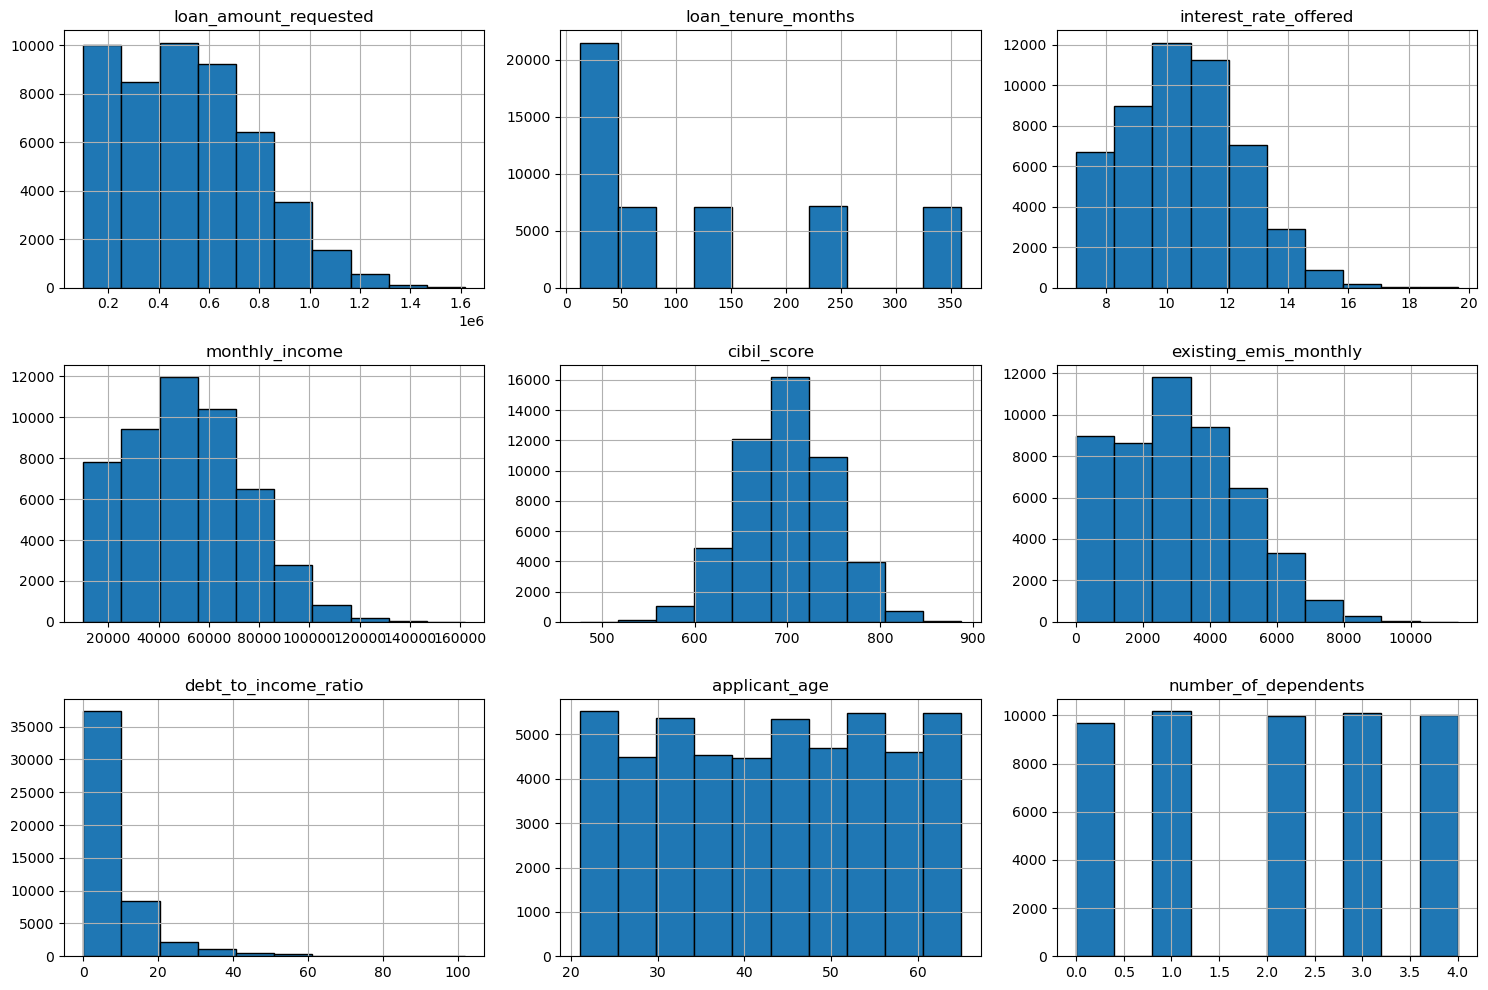

In [74]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = loan_applications.select_dtypes(include=np.number).columns

# Plot histograms
loan_applications[numeric_columns].hist(figsize=(15, 10), layout=(3, 3), edgecolor='black')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


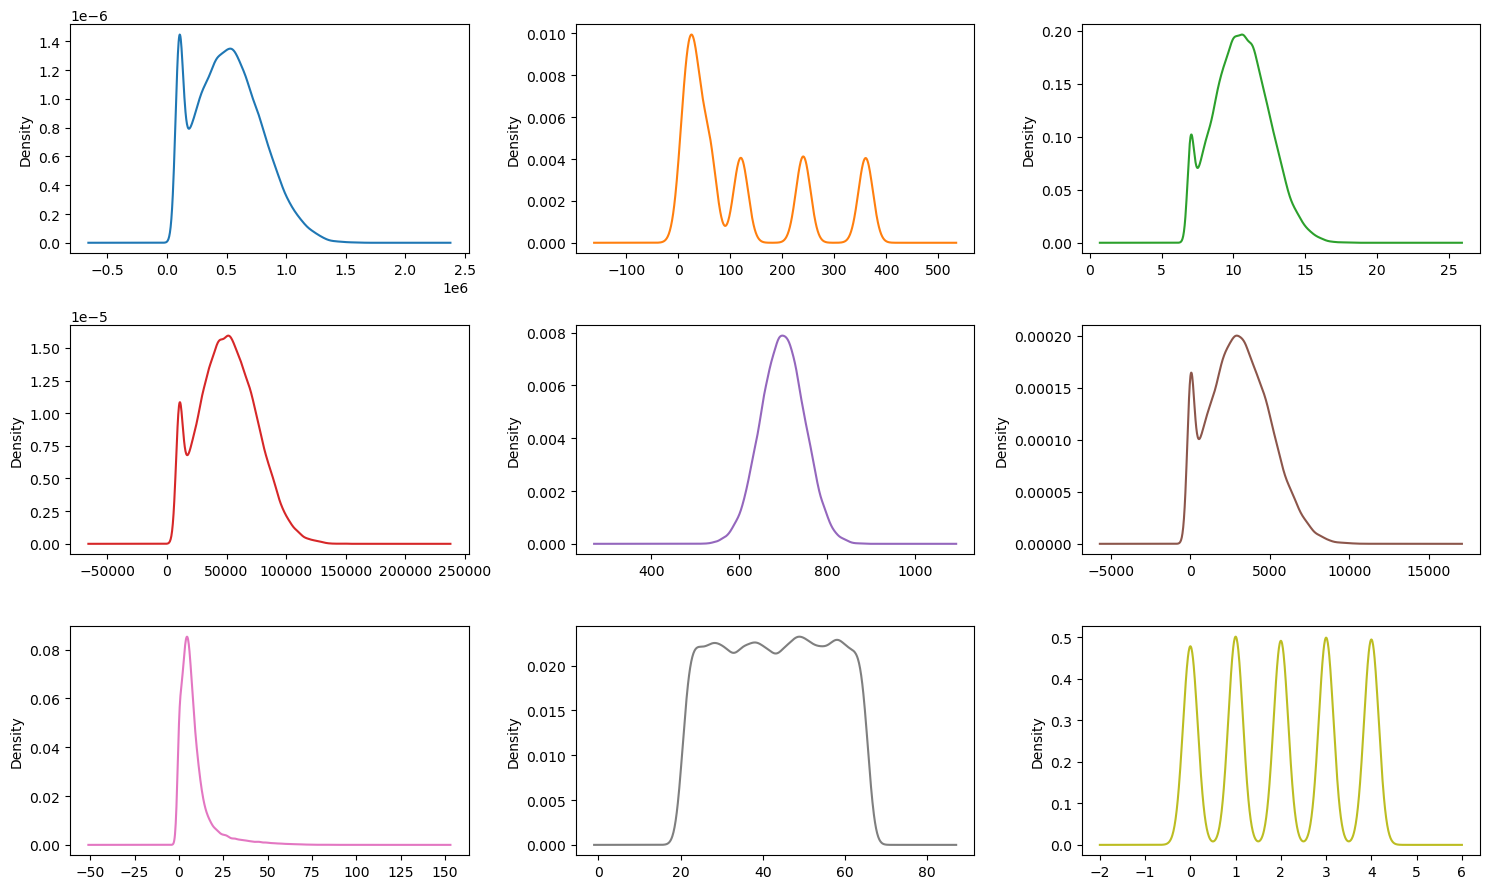

In [76]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = loan_applications.select_dtypes(include=np.number).columns

# Calculate the number of plots needed
num_cols = len(numeric_columns)
cols = 3  # Number of plots per row
rows = (num_cols + cols - 1) // cols  # Compute number of rows needed

# Plot density plots
loan_applications[numeric_columns].plot(
    kind="density", 
    subplots=True, 
    layout=(rows, cols), 
    sharex=False, 
    figsize=(cols * 5, rows * 3),
    legend=False
)

plt.tight_layout()
plt.show()


**Box plot**

<Axes: xlabel='cibil_score'>

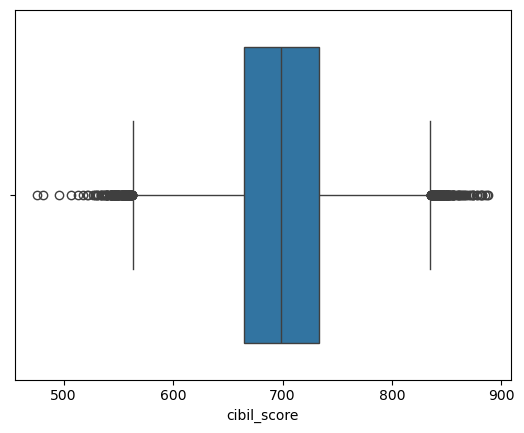

In [80]:
import seaborn as sns
sns.boxplot(x="cibil_score", data=loan_applications)


<Axes: ylabel='cibil_score'>

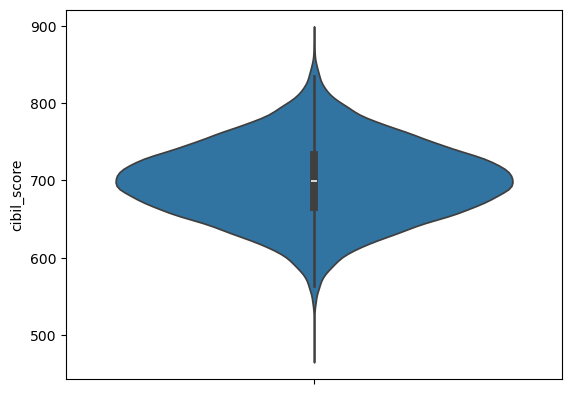

In [81]:
sns.violinplot(data=loan_applications["cibil_score"])